In [13]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import sys, os,cv2
from sklearn.utils import shuffle
from scipy.misc import imread,imresize
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage.transform import resize
from imgaug import augmenters as iaa
import imgaug as ia
from scipy.ndimage import zoom
import seaborn as sns

old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data
np.random.seed(789)

In [14]:
# import data
mnist = input_data.read_data_sets('../../Dataset/MNIST/', one_hot=True)
train_data, train_label, test_data, test_label = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting ../../Dataset/MNIST/train-images-idx3-ubyte.gz
Extracting ../../Dataset/MNIST/train-labels-idx1-ubyte.gz
Extracting ../../Dataset/MNIST/t10k-images-idx3-ubyte.gz
Extracting ../../Dataset/MNIST/t10k-labels-idx1-ubyte.gz


(55000, 784)
0.0 1.0
(55000, 10)
0.0 1.0
(10000, 784)
0.0 1.0
(10000, 10)
0.0 1.0
-----------------------


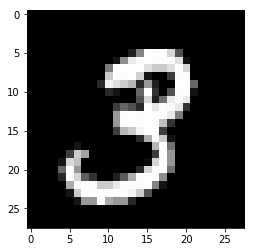

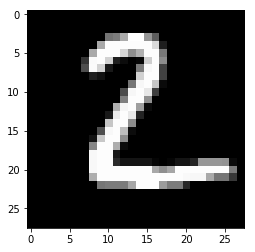

In [24]:
# Show some details and vis some of them
print(train_data.shape)
print(train_data.min(),train_data.max())
print(train_label.shape)
print(train_label.min(),train_label.max())
print(test_data.shape)
print(test_data.min(),test_data.max())
print(test_label.shape)
print(test_label.min(),test_label.max())
print('-----------------------')

plt.imshow(train_data[1].reshape((28,28)),cmap='gray')
plt.show()
plt.imshow(test_data[1].reshape((28,28)),cmap='gray')
plt.show()

In [27]:
# create layer
def np_sigmoid(x): return 1.0 / (1.0+np.exp(-x))
def d_np_sigmoid(x): return np_sigmoid(x) * (1.0 - np_sigmoid(x))

class np_FNN():
    
    def __init__(self,inc,outc):
        self.w = np.random.randn(inc,outc)
        self.m,self.v = np.zeros_like(self.w),np.zeros_like(self.w)
        
    def feedforward(self,input):
        self.input  = input
        self.layer  = self.input.dot(self.w)
        self.layerA = np_sigmoid(self.layer)
        return serf.layerA
    
    def backprop(self,grad):
        grad_1 = grad
        grad_2 = d_np_sigmoid(self.layer)
        grad_3 = self.input
        
        grad_middle = grad_1 * grad_2
        grad = grad_3.T.dot(grad_middle) / batch_size
        grad_pass = grad_middle.dot(self.w.T)
        
        self.m = self.m * beta1 + (1. - beta1) * grad 
        self.v = self.v * beta2 + (1. - beta2) * grad ** 2
        m_hat,v_hat = self.m/(1.-beta1), self.v/(1.-beta2)
        adam_middle = learning_rate / (np.sqrt(v_hat) + adam_e) * m_hat
        self.w = self.w - adam_middle
        
        return grad_pass